BALANCED DATASET

1.IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns

2.LOADING DATA SET

In [2]:
balanced_df = pd.read_csv("balanced_dataset.csv")   
print("Dataset loaded:", balanced_df.shape)
balanced_df.head()

Dataset loaded: (25000, 2)


,Score,Summary
0,2,"They taste great, but the taste isn't all that..."
1,5,Keeps dental cleanings down!
2,2,"Good tea but pricey pouches, with enough for a..."
3,3,Wanted to love them...
4,3,Vital Wheat Gluten


3..REMOVING LOWERCASE

In [3]:
balanced_df["Summary"] = balanced_df["Summary"].astype(str).str.lower()
balanced_df.head()

,Score,Summary
0,2,"they taste great, but the taste isn't all that..."
1,5,keeps dental cleanings down!
2,2,"good tea but pricey pouches, with enough for a..."
3,3,wanted to love them...
4,3,vital wheat gluten


4.Remove URLs, HTML tags, emojis, punctuation and special characters

In [4]:
import re

def clean_text(text):
    text = text.lower()                          # lowercase
    text = re.sub(r'http\S+|www\S+', '', text)   # remove URLs
    text = re.sub(r'<.*?>', '', text)            # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)         # remove emojis, punctuation, special chars
    return text
balanced_df['clean_text'] = balanced_df['Summary'].apply(clean_text)
balanced_df.head()

,Score,Summary,clean_text
0,2,"they taste great, but the taste isn't all that...",they taste great but the taste isnt all that y...
1,5,keeps dental cleanings down!,keeps dental cleanings down
2,2,"good tea but pricey pouches, with enough for a...",good tea but pricey pouches with enough for a ...
3,3,wanted to love them...,wanted to love them
4,3,vital wheat gluten,vital wheat gluten


5.REMOVE STOPWORDS

In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

STOPWORDS = ENGLISH_STOP_WORDS

all_text = " ".join(balanced_df["clean_text"])

words = all_text.split()

unique_stops = {w for w in words if w in STOPWORDS}
balanced_df.head()



,Score,Summary,clean_text
0,2,"they taste great, but the taste isn't all that...",they taste great but the taste isnt all that y...
1,5,keeps dental cleanings down!,keeps dental cleanings down
2,2,"good tea but pricey pouches, with enough for a...",good tea but pricey pouches with enough for a ...
3,3,wanted to love them...,wanted to love them
4,3,vital wheat gluten,vital wheat gluten


6.LEMMATIZATION

In [6]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet', quiet=True)

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

balanced_df['lemmatize_Review'] = balanced_df['clean_text'].apply(lemmatize_text)
balanced_df.head()


,Score,Summary,clean_text,lemmatize_Review
0,2,"they taste great, but the taste isn't all that...",they taste great but the taste isnt all that y...,they taste great but the taste isnt all that y...
1,5,keeps dental cleanings down!,keeps dental cleanings down,keep dental cleaning down
2,2,"good tea but pricey pouches, with enough for a...",good tea but pricey pouches with enough for a ...,good tea but pricey pouch with enough for a cu...
3,3,wanted to love them...,wanted to love them,wanted to love them
4,3,vital wheat gluten,vital wheat gluten,vital wheat gluten


7.COUNT WORDS 

In [7]:
# filtering words
def filter_review(text, min_words=3, max_words=150):
    words = text.split()

    if len(words) < min_words:
        return False
    if len(words) > max_words:
        return False
    
    return True

8.CHECKING IF THE DATASET BALANCED OR IMBALANCED

In [8]:
balanced_df['Score'].value_counts()

Score
2    5000
5    5000
3    5000
1    5000
4    5000
Name: count, dtype: int64

9.BAR PLOT

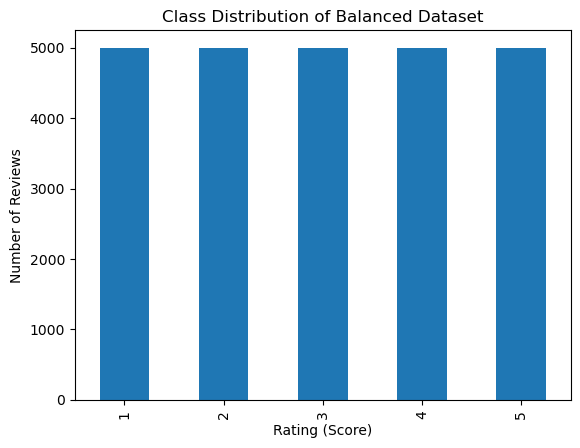

In [9]:
import matplotlib.pyplot as plt

# Count values from BALANCED dataset
class_counts = balanced_df['Score'].value_counts().sort_index()

# Plot bar chart
plt.figure()
class_counts.plot(kind='bar')

plt.xlabel("Rating (Score)")
plt.ylabel("Number of Reviews")
plt.title("Class Distribution of Balanced Dataset")

plt.show()


10.WORD COUNT

11.SAMPLE REVIEWS OF 1-5

In [10]:
# Display 10 sample cleaned reviews per rating from BALANCED dataset

for rating in sorted(balanced_df['Score'].unique()):
    print(f"\n⭐ Sample reviews for Rating {rating}:\n")

    samples = (
        balanced_df[balanced_df['Score'] == rating]['clean_text']
        .sample(n=10, random_state=42)
    )

    for r in samples:
        print("•", r)



⭐ Sample reviews for Rating 1:

• pretty lousy and a total ripoff
• not beautiful and not tasty
• kind of gross
• i was really disappointed in this product
• honestly plain water does the trick
• a ruined product
• like thick cloyingly sweet sugar syrup
• celiacs beware   contains gluten 
• arrived late
• whole wheat yeah right

⭐ Sample reviews for Rating 2:

• be careful
• these are okay but you can do better for your cat  wallet
• though it was ate i wont purchase again
• cardboard taste
• misleading advertising
• wheres the gravy
• crumby cookies
• busy buddy round
• too much like keemum
• good seasons salad dressing

⭐ Sample reviews for Rating 3:

• tastes great
• coffee ok but price is excessive
• sweet but doesnt live up to billing
• dont compare these to goldfishcheese itscheese nips
• great flavor lousy price
• cat doesnt like this flavor
• dog turned up nose with this type of dog food
• good taste but little amount of curry
• my dog wouldnt eat them
• optical illusion

⭐ Sa

In [11]:
balanced_df['Score'].value_counts()


Score
2    5000
5    5000
3    5000
1    5000
4    5000
Name: count, dtype: int64

12.DATASET SHUFFLING

In [12]:

balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
print("Balanced dataset shuffled")


Balanced dataset shuffled


In [13]:
print(balanced_df.columns)


Index(['Score', 'Summary', 'clean_text', 'lemmatize_Review'], dtype='object')


13.TRAIN-TEST SPLIT

In [14]:
from sklearn.model_selection import train_test_split

# Features and labels
X = balanced_df['Summary']   # or 'clean_text' if that is your processed column
y = balanced_df['Score']     # rating 1–5

# Stratified train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    shuffle=True,
    stratify=y
)

# Output sizes and class distribution
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

print("\nClass distribution in training set:")
print(y_train.value_counts())

print("\nClass distribution in testing set:")
print(y_test.value_counts())


Training set size: 20000
Test set size: 5000

Class distribution in training set:
Score
2    4000
4    4000
1    4000
3    4000
5    4000
Name: count, dtype: int64

Class distribution in testing set:
Score
3    1000
4    1000
5    1000
2    1000
1    1000
Name: count, dtype: int64


14.VECTORIZATION

In [15]:
#5:vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)   

# Fit only on TRAIN data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform TEST data using the same vocabulary learned from train
X_test_vec = vectorizer.transform(X_test)

print("Vectorization completed successfully!")
print("Training matrix shape:", X_train_vec.shape)
print("Testing matrix shape:", X_test_vec.shape)


Vectorization completed successfully!
Training matrix shape: (20000, 5000)
Testing matrix shape: (5000, 5000)


In [16]:
balanced_df['Score'].value_counts()

Score
1    5000
4    5000
2    5000
5    5000
3    5000
Name: count, dtype: int64

In [17]:
# # Display 10 sample reviews per rating (Balanced Dataset)

# #for rating in range(1, 6):
#  #   print(f"\nRating: {rating} | Showing 10 sample reviews")
#   #  print("=" * 40)

#     # Filter reviews of selected rating from BALANCED dataset
#    # samples = (
#     #    balanced_df[balanced_df['Score'] == rating]['Summary']
#      #   .sample(n=10, random_state=42)
#     )

#     Print index and review text
#     for idx, review in samples.items():
#         print(f"\nReview {idx}:")
#         print(review)


In [18]:
# # Display 10 sample reviews per rating (1–5) from BALANCED dataset

# for rating in range(1, 6):
#     print(f"\n{'='*60}")
#     print(f" Rating: {rating} ⭐ | 10 Sample Reviews")
#     print(f"{'='*60}")
    
#     samples = (
#         balanced_df[balanced_df['Score'] == rating]['Summary']
#         .sample(n=10, random_state=42)
#         .reset_index(drop=True)
#     )
    
#     for i, review in enumerate(samples, start=1):
#         print(f"{i}. {review}")


15.LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='newton-cg')
logit.fit(X_train_vec,y_train)
y_pred_train = logit.predict(X_train_vec)
y_pred_test = logit.predict(X_test_vec)

15.1 ACCURACY SCORE

In [20]:
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("train:",accuracy_score(y_train,y_pred_train))
print("test:",accuracy_score(y_test,y_pred_test))

train: 0.6137
test: 0.4206


In [35]:
sample_text = [
    "my husbands favorite teaonly available sporadically on amazon and worth jumping on when for sale"
]
sample_vect = vectorizer.transform(sample_text)
logit.predict(sample_vect)

array([5])

15.2 PRECISION,RECALL,F1-SCORE

In [21]:
print("train:",classification_report(y_train,y_pred_train))
print("test:",classification_report(y_test,y_pred_test))

train:               precision    recall  f1-score   support

           1       0.64      0.69      0.67      4000
           2       0.57      0.57      0.57      4000
           3       0.58      0.52      0.55      4000
           4       0.59      0.56      0.58      4000
           5       0.67      0.73      0.70      4000

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000

test:               precision    recall  f1-score   support

           1       0.49      0.54      0.51      1000
           2       0.35      0.36      0.36      1000
           3       0.35      0.31      0.33      1000
           4       0.38      0.35      0.36      1000
           5       0.50      0.55      0.52      1000

    accuracy                           0.42      5000
   macro avg       0.42      0.42      0.42      5000
weighted avg       0.42      0.42      0.42      5000



16.RANDOM FOREST

In [22]:
#Train Model B-Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model_rf.fit(X_train_vec, y_train)
y_pred_train_1= model_rf.predict(X_train_vec)
y_pred_test_1= model_rf.predict(X_test_vec)
print("random forest trained")

random forest trained


16.2 ACCURACY SCORE

In [23]:
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("train:",accuracy_score(y_train,y_pred_train_1))
print("test:",accuracy_score(y_test,y_pred_test_1))

train: 0.9547
test: 0.4136


16.3 PRECISION RECALL F1-SCORE

In [24]:
print("train:",classification_report(y_train,y_pred_train_1))
print("test:",classification_report(y_test,y_pred_test_1))

train:               precision    recall  f1-score   support

           1       0.96      0.95      0.95      4000
           2       0.91      0.95      0.93      4000
           3       0.97      0.94      0.95      4000
           4       0.97      0.96      0.96      4000
           5       0.97      0.97      0.97      4000

    accuracy                           0.95     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.95      0.95     20000

test:               precision    recall  f1-score   support

           1       0.46      0.48      0.47      1000
           2       0.33      0.36      0.35      1000
           3       0.36      0.33      0.35      1000
           4       0.40      0.35      0.37      1000
           5       0.51      0.55      0.53      1000

    accuracy                           0.41      5000
   macro avg       0.41      0.41      0.41      5000
weighted avg       0.41      0.41      0.41      5000



17. MULTINOMIAL NAIVE BAYES TRAINED

In [25]:
#Train Model C-Multinomial Naive bayes
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)
y_pred_train_2= model_nb.predict(X_train_vec)
y_pred_test_2= model_nb.predict(X_test_vec)
print("Multinomial Naive bayes Trained")


Multinomial Naive bayes Trained


17.1 ACCURACY

In [26]:
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("train:",accuracy_score(y_train,y_pred_train_2))
print("test:",accuracy_score(y_test,y_pred_test_2))

train: 0.5866
test: 0.4096


17.2 PRECISION,RECALL,F1-SCORE

In [27]:
print("train:",classification_report(y_train,y_pred_train_2))
print("test:",classification_report(y_test,y_pred_test_2))

train:               precision    recall  f1-score   support

           1       0.61      0.66      0.64      4000
           2       0.57      0.50      0.53      4000
           3       0.54      0.53      0.53      4000
           4       0.56      0.55      0.56      4000
           5       0.64      0.69      0.66      4000

    accuracy                           0.59     20000
   macro avg       0.58      0.59      0.58     20000
weighted avg       0.58      0.59      0.58     20000

test:               precision    recall  f1-score   support

           1       0.47      0.52      0.49      1000
           2       0.36      0.32      0.34      1000
           3       0.33      0.35      0.34      1000
           4       0.37      0.34      0.36      1000
           5       0.50      0.52      0.51      1000

    accuracy                           0.41      5000
   macro avg       0.41      0.41      0.41      5000
weighted avg       0.41      0.41      0.41      5000



18.BEST MODEL

In [32]:
from sklearn.metrics import accuracy_score

# Calculate test accuracy for each model
acc_lr = accuracy_score(y_test, y_pred_test)        # Logistic Regression
acc_rf = accuracy_score(y_test, y_pred_test_1)      # Random Forest
acc_nb = accuracy_score(y_test, y_pred_test_2)      # Multinomial Naive Bayes

# Store results
results = {
    "Logistic Regression": acc_lr,
    "Random Forest": acc_rf,
    "Multinomial Naive Bayes": acc_nb
}

# Print accuracies
print("Model Test Accuracies:")
for model, acc in results.items():
    print(model, ":", acc)

# Find best model
best_model = max(results, key=results.get)

print("\nBest Model:", best_model)
print("Best Accuracy:", results[best_model])


Model Test Accuracies:
Logistic Regression : 0.4206
Random Forest : 0.4136
Multinomial Naive Bayes : 0.4096

Best Model: Logistic Regression
Best Accuracy: 0.4206


19.MODEL A

In [34]:
from joblib import dump

dump(logit, "Model_A.pkl")
print("Model_A (balanced) saved")

Model_A (balanced) saved


In [37]:
from joblib import dump
dump(vectorizer, "tfidf_A.pkl")
print("TF-IDF saved successfully")

TF-IDF saved successfully


In [36]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_B = joblib.load("Model_B.pkl")
print("Model_B loaded successfully!")
tfidf_B = joblib.load("tfidf_B.pkl")
print("TF-IDF_B loaded successfully!")

Model_B loaded successfully!
TF-IDF_B loaded successfully!
